First 5 rows:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Shape of dataset: (768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Zero counts in critical columns:
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64
Missing values after imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


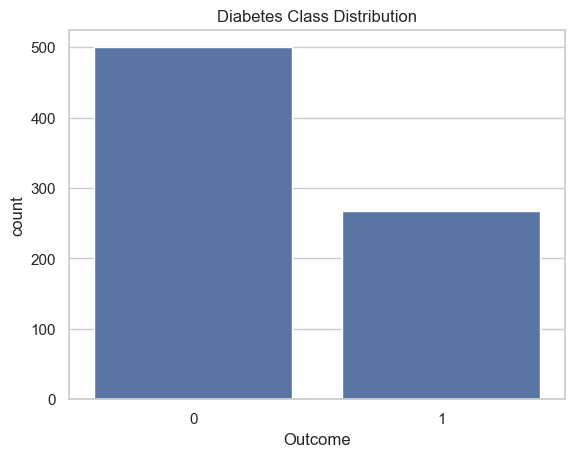

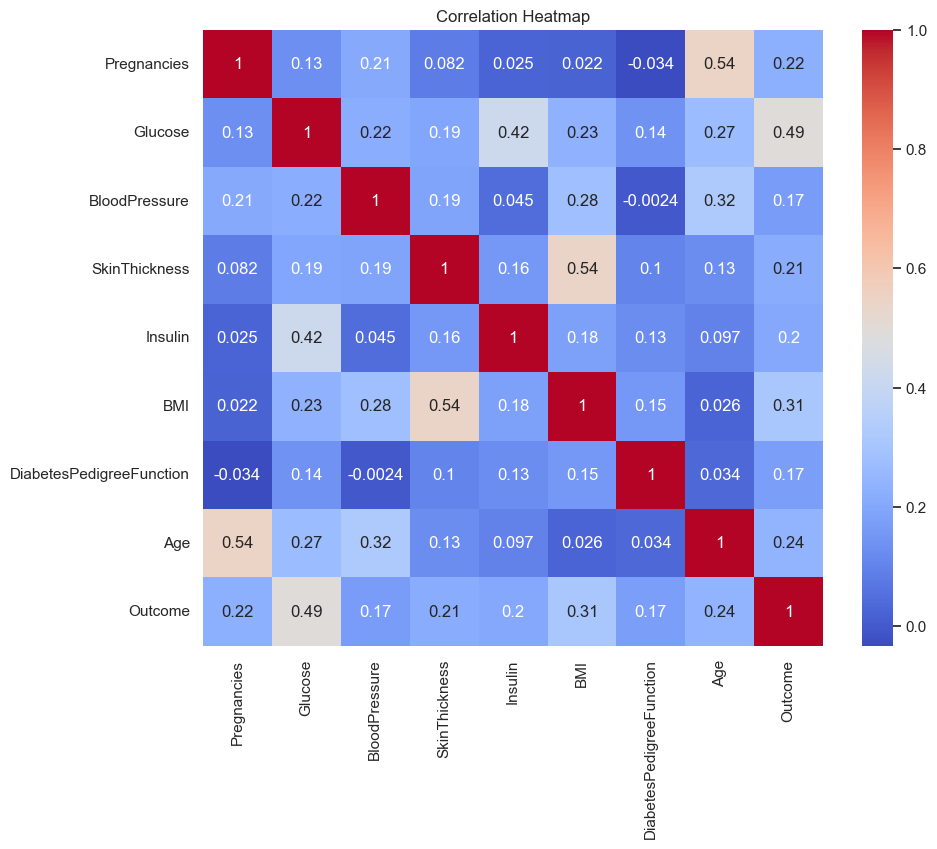

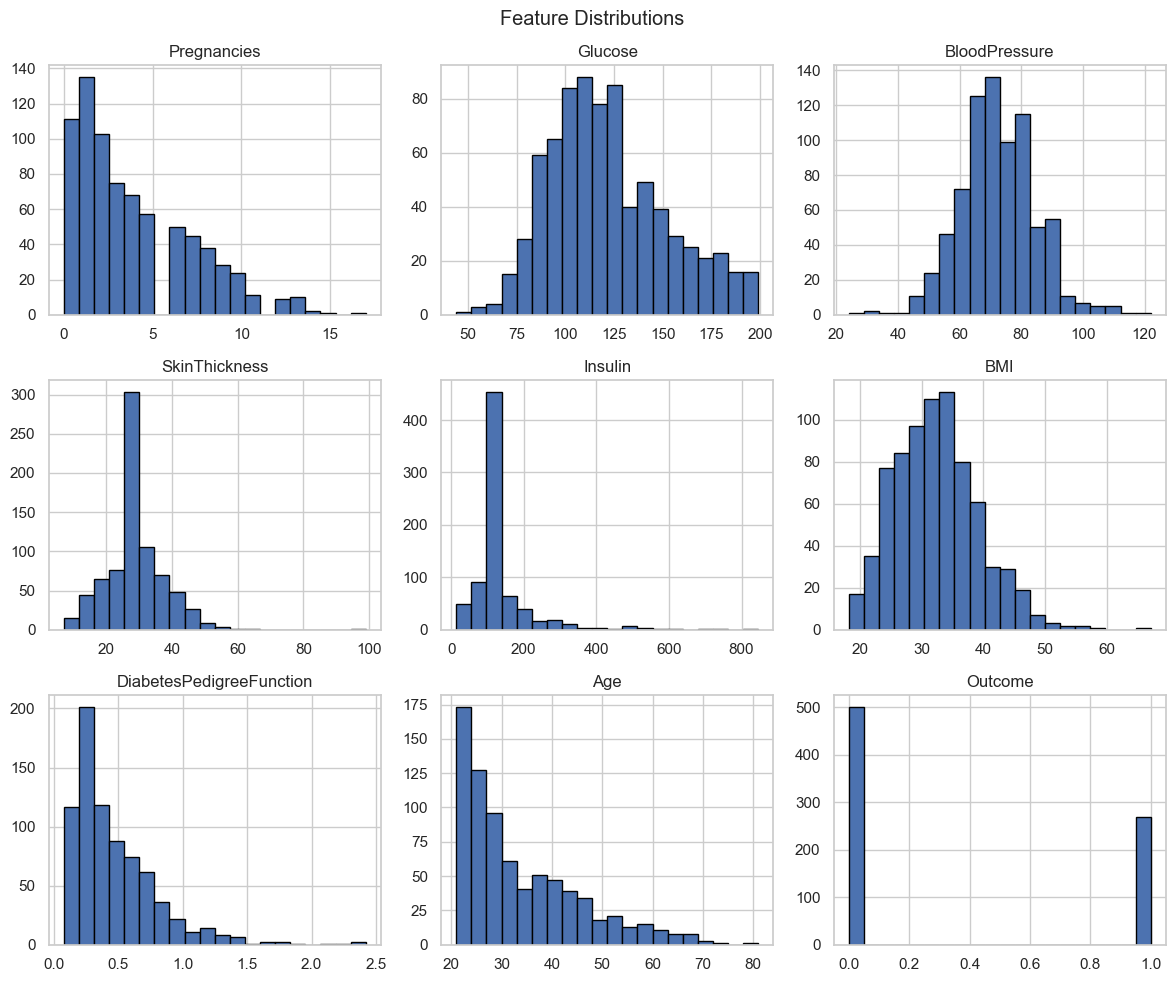

Accuracy: 0.7467532467532467

Confusion Matrix:
 [[78 21]
 [18 37]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

Model saved as model.pkl


In [1]:
# STEP 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")

# STEP 2: Load the Dataset (from Downloads folder)
df = pd.read_csv(r"C:\Users\PAVANI\Downloads\diabetes.csv")
print("First 5 rows:")
display(df.head())

# STEP 3: Basic Info
print("Shape of dataset:", df.shape)
df.info()
display(df.describe())

# STEP 4: Check for Zeros in Important Columns
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
print("Zero counts in critical columns:")
print((df[cols_with_zero] == 0).sum())

# STEP 5: Replace Zeros with NaN & Impute
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)
df.fillna(df.median(numeric_only=True), inplace=True)
print("Missing values after imputation:")
print(df.isnull().sum())

# STEP 6: Target Class Distribution
sns.countplot(data=df, x='Outcome')
plt.title('Diabetes Class Distribution')
plt.show()

# STEP 7: Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# STEP 8: Feature Distributions
df.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions")
plt.tight_layout()
plt.show()

# STEP 9: Train-Test Split
from sklearn.model_selection import train_test_split

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 10: Model Training
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# STEP 11: Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# STEP 12: Save the Model
import pickle
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

print("Model saved as model.pkl")


In [3]:
import requests

url = 'http://127.0.0.1:5000/predict'
data = {
    "Pregnancies": 2,
    "Glucose": 130,
    "BloodPressure": 70,
    "SkinThickness": 28,
    "Insulin": 130,
    "BMI": 35.5,
    "DiabetesPedigreeFunction": 0.67,
    "Age": 35
}

response = requests.post(url, json=data)
print(response.json())


{'prediction': 1, 'result': 'Diabetic'}
